### Perform Hierarchical Clustering

Visualise which stations cluster together based on their venue types.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler # normalize dataset

import scipy # scipy clustering
import pylab # scipy clustering
from scipy.cluster import hierarchy # scipy clustering
from scipy.cluster.hierarchy import fcluster

from scipy.spatial import distance_matrix # SCIKIT cluster

import matplotlib.cm as cm # SCITKIT visualize

from scipy import ndimage



from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs




print('Libraries imported.')

Libraries imported.


### Load Dataset

In [2]:
Stations_VenueCounts = pd.read_csv('Stations_VenueCounts_Percent.csv', index_col = 0)
print(Stations_VenueCounts.head())

            City   Latitude  Longitude  Arts & Entertainment  \
Bayview   Ottawa  45.409230 -75.722323                   6.0   
Blair     Ottawa  45.431026 -75.608416                   1.0   
Cyrville  Ottawa  45.422745 -75.626372                   2.0   
Hurdman   Ottawa  45.412357 -75.664320                   2.0   
Lees      Ottawa  45.416366 -75.670539                   3.0   

          College & University  Food  Nightlife Spot  Outdoors & Recreation  \
Bayview                    1.0  16.0             7.0                    6.0   
Blair                      1.0  27.0             1.0                    4.0   
Cyrville                   0.0   9.0             2.0                    2.0   
Hurdman                   11.0  15.0             3.0                   14.0   
Lees                      15.0  17.0             3.0                   13.0   

          Professional & Other Places  Shop & Service  Travel & Transport  
Bayview                          26.0            32.0           

### Hierarchical Cluster Analysis

Distance Matrix

In [6]:
data_000 = Stations_VenueCounts.iloc[:,3:11]

dist_matrix = distance_matrix(data_000, data_000)

dist_matrix

array([[ 0.        , 15.71623365, 15.65247584, 30.16620626, 29.93325909,
        31.32091953, 23.3023604 , 21.3541565 , 26.55183609, 47.95831523,
        27.5680975 , 70.87312608, 25.63201124, 10.09950494, 19.02629759,
        23.13006701, 37.88139385, 26.75817632, 23.49468025, 31.09662361,
        34.278273  , 31.30495168, 30.06659276, 28.93095228, 34.2636834 ,
        15.19868415],
       [15.71623365,  0.        , 22.8035085 , 32.10918872, 32.41913015,
        38.88444419, 31.04834939, 25.03996805, 29.12043956, 42.20189569,
        24.2693222 , 73.37574531, 34.3220046 , 12.04159458, 16.03121954,
        31.8747549 , 46.17358552, 33.92639091, 19.92485885, 37.28270376,
        36.49657518, 38.4317577 , 38.82009789, 33.49626845, 32.29551052,
         8.24621125],
       [15.65247584, 22.8035085 ,  0.        , 37.21558813, 38.74274126,
        32.09361307, 25.37715508, 33.83784863, 36.49657518, 46.44351408,
        31.19294792, 76.64202503, 23.32380758, 20.22374842, 31.79622619,
       

Clustering

In [7]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\DataScience\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Visualization

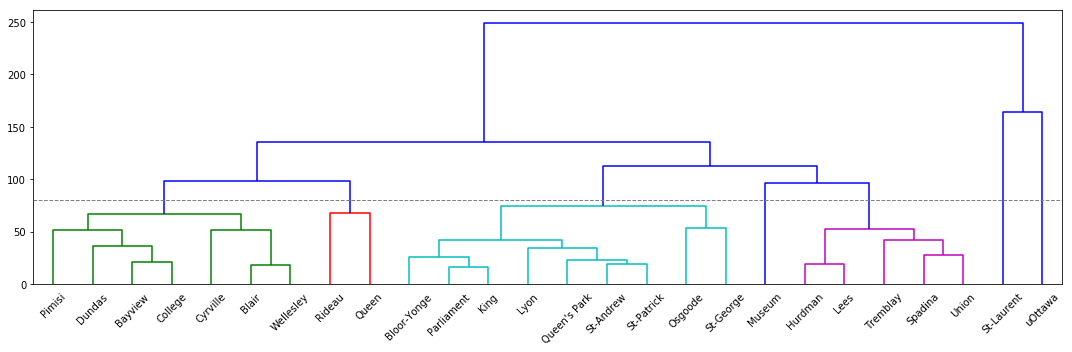

In [13]:
fig = pylab.figure(figsize=(15,5))

dendro = hierarchy.dendrogram(Z, labels = data_000.index, color_threshold = 80)

plt.axhline(y=80, c='grey', lw=1, linestyle='dashed')

plt.tight_layout()

plt.savefig('Macumber_Coursera_Capstone_Figure02.png') # has to be before plt.show()


_Based on the above figure the majority of stations cluster at distances <50. This level would result in eight clusters with only one member. Increasing the cut-off to 80 reduces the number of clusters with only one member to three. Thus we have selected 7 clusters for the final result._

Generate Cluster Labels

In [14]:
agglom = AgglomerativeClustering(n_clusters = 7, linkage = 'complete')
agglom.fit(dist_matrix)
agglom.labels_

C:\DataScience\lib\site-packages\sklearn\cluster\hierarchical.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([2, 2, 2, 4, 4, 0, 0, 2, 1, 5, 4, 3, 0, 2, 2, 0, 6, 0, 1, 0, 4, 0,
       0, 0, 4, 2], dtype=int64)

Add Cluster To Each Row

In [15]:
results_000 = Stations_VenueCounts

results_000['Cluster']=agglom.labels_
results_000.head()

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Bayview,Ottawa,45.409230,-75.722323,6.0,1.0,16.0,7.0,6.0,26.0,32.0,7.0,2
Blair,Ottawa,45.431026,-75.608416,1.0,1.0,27.0,1.0,4.0,20.0,36.0,10.0,2
Cyrville,Ottawa,45.422745,-75.626372,2.0,0.0,9.0,2.0,2.0,33.0,40.0,12.0,2
Hurdman,Ottawa,45.412357,-75.664320,2.0,11.0,15.0,3.0,14.0,16.0,15.0,25.0,4
Lees,Ottawa,45.416366,-75.670539,3.0,15.0,17.0,3.0,13.0,17.0,12.0,19.0,4


### Final Dataframe

In [28]:
results_001 = results_000.sort_values(by = ['Cluster', 'City'])

results_001

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Lyon,Ottawa,45.418518,-75.705015,1.0,2.0,14.0,2.0,4.0,47.0,12.0,16.0,0
Parliament,Ottawa,45.421389,-75.698889,2.0,0.0,19.0,3.0,4.0,46.0,23.0,3.0,0
Bloor-Yonge,Toronto,43.670812,-79.386847,1.0,3.0,13.0,1.0,3.0,49.0,26.0,4.0,0
King,Toronto,43.648523,-79.377773,2.0,1.0,16.0,4.0,4.0,45.0,20.0,8.0,0
Osgoode,Toronto,43.650802,-79.386541,7.0,1.0,19.0,5.0,9.0,36.0,9.0,15.0,0
Queen's Park,Toronto,43.659980,-79.390369,2.0,11.0,21.0,1.0,2.0,47.0,14.0,4.0,0
St-Andrew,Toronto,43.647792,-79.384871,2.0,2.0,20.0,3.0,2.0,51.0,15.0,6.0,0
St-George,Toronto,43.668641,-79.398019,10.0,21.0,11.0,4.0,4.0,33.0,12.0,6.0,0
St-Patrick,Toronto,43.654820,-79.388274,2.0,3.0,26.0,1.0,2.0,46.0,16.0,4.0,0
Rideau,Ottawa,45.152272,-75.650269,2.0,1.0,16.0,6.0,28.0,12.0,30.0,5.0,1


In [33]:
results_002 = results_001.drop(['Latitude','Longitude'],1)

results_003 = results_002.groupby('Cluster').mean().round(1)

results_003

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
Cluster,,,,,,,,
0,3.2,4.9,17.7,2.7,3.8,44.4,16.3,7.3
1,3.5,0.5,17.5,4.5,15.0,14.0,41.0,4.5
2,5.7,1.3,22.1,3.3,5.3,23.4,31.1,8.0
3,1.0,64.0,8.0,3.0,5.0,10.0,6.0,3.0
4,2.6,6.8,18.4,2.6,7.2,18.4,15.6,28.0
5,2.0,1.0,19.0,0.0,1.0,4.0,73.0,1.0
6,24.0,23.0,9.0,3.0,7.0,22.0,9.0,3.0


Examine Members of Each Cluster

In [34]:
results_000.loc[results_000['Cluster'] == 0]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Lyon,Ottawa,45.418518,-75.705015,1.0,2.0,14.0,2.0,4.0,47.0,12.0,16.0,0
Parliament,Ottawa,45.421389,-75.698889,2.0,0.0,19.0,3.0,4.0,46.0,23.0,3.0,0
Bloor-Yonge,Toronto,43.670812,-79.386847,1.0,3.0,13.0,1.0,3.0,49.0,26.0,4.0,0
King,Toronto,43.648523,-79.377773,2.0,1.0,16.0,4.0,4.0,45.0,20.0,8.0,0
Osgoode,Toronto,43.650802,-79.386541,7.0,1.0,19.0,5.0,9.0,36.0,9.0,15.0,0
Queen's Park,Toronto,43.659980,-79.390369,2.0,11.0,21.0,1.0,2.0,47.0,14.0,4.0,0
St-Andrew,Toronto,43.647792,-79.384871,2.0,2.0,20.0,3.0,2.0,51.0,15.0,6.0,0
St-George,Toronto,43.668641,-79.398019,10.0,21.0,11.0,4.0,4.0,33.0,12.0,6.0,0
St-Patrick,Toronto,43.654820,-79.388274,2.0,3.0,26.0,1.0,2.0,46.0,16.0,4.0,0


In [35]:
results_000.loc[results_000['Cluster'] == 1]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Rideau,Ottawa,45.152272,-75.650269,2.0,1.0,16.0,6.0,28.0,12.0,30.0,5.0,1
Queen,Toronto,43.652908,-79.379458,5.0,0.0,19.0,3.0,2.0,16.0,52.0,4.0,1


In [36]:
results_000.loc[results_000['Cluster'] == 2]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Bayview,Ottawa,45.409230,-75.722323,6.0,1.0,16.0,7.0,6.0,26.0,32.0,7.0,2
Blair,Ottawa,45.431026,-75.608416,1.0,1.0,27.0,1.0,4.0,20.0,36.0,10.0,2
Cyrville,Ottawa,45.422745,-75.626372,2.0,0.0,9.0,2.0,2.0,33.0,40.0,12.0,2
Pimisi,Ottawa,45.413592,-75.713726,15.0,1.0,22.0,1.0,13.0,19.0,18.0,10.0,2
College,Toronto,43.660662,-79.382795,4.0,2.0,24.0,3.0,4.0,28.0,29.0,7.0,2
Dundas,Toronto,43.656537,-79.381022,8.0,3.0,32.0,3.0,5.0,22.0,25.0,3.0,2
Wellesley,Toronto,43.665403,-79.383600,4.0,1.0,25.0,6.0,3.0,16.0,38.0,7.0,2


In [37]:
results_000.loc[results_000['Cluster'] == 3]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
uOttawa,Ottawa,45.42053,-75.68228,1.0,64.0,8.0,3.0,5.0,10.0,6.0,3.0,3


In [38]:
results_000.loc[results_000['Cluster'] == 4]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Hurdman,Ottawa,45.412357,-75.664320,2.0,11.0,15.0,3.0,14.0,16.0,15.0,25.0,4
Lees,Ottawa,45.416366,-75.670539,3.0,15.0,17.0,3.0,13.0,17.0,12.0,19.0,4
Tremblay,Ottawa,45.416933,-75.653348,2.0,1.0,20.0,0.0,5.0,16.0,25.0,30.0,4
Spadina,Toronto,43.667235,-79.403686,2.0,7.0,14.0,3.0,3.0,24.0,13.0,34.0,4
Union,Toronto,43.644690,-79.379966,4.0,0.0,26.0,4.0,1.0,19.0,13.0,32.0,4


In [39]:
results_000.loc[results_000['Cluster'] == 5]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
St-Laurent,Ottawa,45.420605,-75.638188,2.0,1.0,19.0,0.0,1.0,4.0,73.0,1.0,5


In [40]:
results_000.loc[results_000['Cluster'] == 6]

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Museum,Toronto,43.667097,-79.393606,24.0,23.0,9.0,3.0,7.0,22.0,9.0,3.0,6


Output the File

In [41]:
results_001.to_csv('Stations_VenueCounts_Clustered.csv')
results_003.to_csv('Stations_VenueCounts_Clustered_Averaged.csv')